### Importing Dependencies

In [3]:
# Importing necessary dependencies (rest of the dependencies will be imported as required)
import pandas as pd
import numpy as np

# Importing libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing required modules to clean up stopwords and punctuation marks
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS # For stopwords
import string   # For punctuations

# Importing regex module to identify related patterns
import re

# Importing relevant modules to tokenize data
from nltk.tokenize import RegexpTokenizer
import nltk

## Importing relevant modules to Lemmatize the data
from nltk import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/avinash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Loading the Data

In [4]:
# Loading the sentiment data into a dataframe (pandas)
sentiment_df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1", names = ['target','ids','date','flag','user','text'])

### Preliminary Exploration of Sentiment140 Dataset

In [5]:
# Exploring the sentiment140 dataset
# Listing down the first 5 rows, checking if the column names match the values underneath
sentiment_df.sample(5)

,target,ids,date,flag,user,text
1222258,4,1990268484,Mon Jun 01 04:23:23 PDT 2009,NO_QUERY,RaraACTIVE,@xo_mcflyandjb i find myself in your story lou...
1460255,4,2063828053,Sun Jun 07 04:14:02 PDT 2009,NO_QUERY,Erykah_,@auriee Ask Amy. She knows
589016,0,2216849290,Wed Jun 17 20:03:07 PDT 2009,NO_QUERY,xxImaDinoxxRawr,I just walked into a wall and it hurt like a b...
1261477,4,1998627714,Mon Jun 01 18:51:50 PDT 2009,NO_QUERY,lend4health,Hubbie told me tonight he might join Twitter. ...
68356,0,1692809519,Sun May 03 20:50:11 PDT 2009,NO_QUERY,kimolivia,been at the library for 8 hours. Wrote 4 parag...


In [6]:
# Same as above command, outputs only the first 5 rows instead of random 5 rows 
sentiment_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
# Listing down the columns for reference
sentiment_df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [8]:
# Checking the number of rows and columns
print('Length of the dataset is : {}'.format(len(sentiment_df)))
print('Count of number of columns in the dataset is : {}'.format(len(sentiment_df.columns)))
print('So, the shape of the dataset is : {}'.format(sentiment_df.shape))

Length of the dataset is : 1600000
Count of number of columns in the dataset is : 6
So, the shape of the dataset is : (1600000, 6)


In [9]:
# Information on each attribute in the dataset
print('The information on each dataset is listed as follows:')
sentiment_df.info()

The information on each dataset is listed as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
# Separate information on datatype for each column
sentiment_df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [11]:
# Checking if the dataset has any null values
np.sum(sentiment_df.isnull().any(axis=1))

0

In [12]:
# Checking the number of unique target (y) values 
print('The number of unique values of the response variable is : {}'.format(sentiment_df['target'].nunique()))
print('The unique values in the response variable are : {}'.format(sentiment_df['target'].unique()))

The number of unique values of the response variable is : 2
The unique values in the response variable are : [0 4]


### Preliminary Graphs

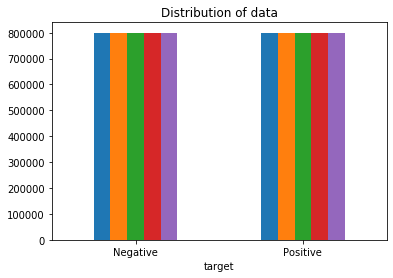

In [13]:
# Plotting the distribution for dataset
dist_g = sentiment_df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
dist_g.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(sentiment_df['text']), list(sentiment_df['target'])

In [14]:
# Just to check the parameters
??dist_g.set_yticklabels

# ??dist_g.plot

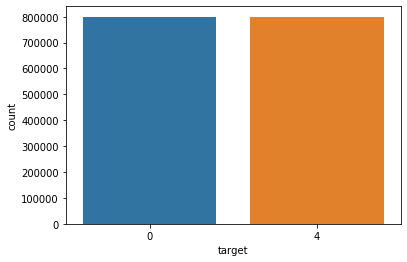

In [15]:
# Drawing the count plot (count of number of observations for each target value)
sns.countplot(x='target', data=sentiment_df)

### Data Preprocessing

The goal is to transform the data which can be used for our modeling purposes



In [16]:
# Building the sentiment analysis dataframe by choosing right columns for analysis

s_analysis_df = sentiment_df[['text', 'target']]

In [17]:
# Listing down all unique values for reference
sentiment_df['target'].unique()

array([0, 4])

In [18]:
# Since there are only two possible target values available, it will be easier if we change them into 0 and 1. 
# Making necessary modifications below

s_analysis_df['target'] = s_analysis_df['target'].replace(4,1)

/Users/avinash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
# Populating values in the sentiment analysis dataframe for reference to check if the new value is implemented

print(s_analysis_df['target'].unique())
print(type(s_analysis_df))

[0 1]
<class 'pandas.core.frame.DataFrame'>


In [20]:
# Separating the positive and negative tweets in two different dataframes (for ease of analysis)

s_analysis_df_pos = s_analysis_df[s_analysis_df['target'] == 1]
s_analysis_df_neg = s_analysis_df[s_analysis_df['target'] == 0]

type(s_analysis_df_pos)
type(s_analysis_df_neg)

pandas.core.frame.DataFrame

In [21]:
# Checking the dimensions of the new dataframes
print('The size of the dataframe with positive tweets is : {}'.format(s_analysis_df_pos.shape))
print('The size of the dataframe with negative tweets is : {}'.format(s_analysis_df_neg.shape))

The size of the dataframe with positive tweets is : (800000, 2)
The size of the dataframe with negative tweets is : (800000, 2)


In [22]:
# Taking a sample of the dataset for faster analysis 
# (we'll use the whole dataset once the developed model is working with this subset of data) 

s_analysis_df_pos = s_analysis_df_pos.iloc[:int(25000)]
s_analysis_df_neg = s_analysis_df_neg.iloc[:int(25000)]

type(s_analysis_df_pos)

pandas.core.frame.DataFrame

In [23]:
# Checking the dimensions of new dataframes (to be sure)

print('The size of the sample positive dataframe is : {}'.format(s_analysis_df_pos.shape))
print('The size of the sample negative dataframe is : {}'.format(s_analysis_df_neg.shape))

The size of the sample positive dataframe is : (25000, 2)
The size of the sample negative dataframe is : (25000, 2)


In [24]:
s_analysis_df_pos.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [25]:
# Converting the sample text values into lowercase (to avoid case related variations during analysis)

s_analysis_df_pos['text'] = s_analysis_df_pos['text'].str.lower()
s_analysis_df_neg['text'] = s_analysis_df_neg['text'].str.lower()

type(s_analysis_df_pos)

pandas.core.frame.DataFrame

In [26]:
# Printing a small sample of both dataframes for review

print('Sample of the postive dataframe is \n{}'.format(s_analysis_df_pos.sample(5)))
print('Sample of the negative dataframe is \n{}'.format(s_analysis_df_neg.sample(5)))

Sample of the postive dataframe is 
                                                     text  target
814169  watching britney spears on velvet channel (ohk...       1
809336  had a lovely night with the best boyfriend and...       1
814539  @khristopherr well, those are hashtags, but i ...       1
808116   @talberman all we got was wine  recession sucks.       1
820502  @hypergal027 i'm gonna visit every damn city i...       1
Sample of the negative dataframe is 
                                                    text  target
16245               @kyethn i know.  that's why i do it.       0
16225                                just lost the game        0
13751  @janetlo exciting! i don't get to go to seoul ...       0
8743   @mynameistod  thanks for the wishes todd.  i h...       0
12762  is at  work....boo....and isn't feeling very w...       0


In [27]:
??s_analysis_df_neg

In [28]:
# Combining positive and negative sample dataset

sample_s_analysis_df = pd.concat([s_analysis_df_pos, s_analysis_df_neg])

In [29]:
sample_s_analysis_df['text']

800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
                                ...                        
24995     is sad that it is raining... no softball for m...
24996                                last day of vacation. 
24997     good morning! its a beautiful day, too bad i'm...
24998     night all. love yas. hahahahahah btw... vodka ...
24999        why do i have to go back to school tomorrow?? 
Name: text, Length: 50000, dtype: object

In [30]:
# Listing down all the stopwords in wordcloud module for reference

stop_words = set(STOPWORDS)
print(stop_words)
print(len(stop_words))

{'very', 'this', "it's", 'ours', 'to', "i'm", "doesn't", 'why', "where's", 'does', 'having', "he'd", 'hence', "shan't", 'were', "weren't", 'cannot', "we've", 'k', 'each', 'can', "you'll", 'there', 'own', "you've", 'while', 'up', 'therefore', 'as', 'yours', 'http', 'you', 'how', 'like', 'in', "why's", "they'll", 'had', "can't", 'our', 'be', 'ever', "i'd", 'has', 'himself', 'through', 'do', "here's", 'above', "isn't", 'for', 'all', 'ourselves', 'after', 'out', 'www', "she'd", "who's", 'and', 'also', 'yourselves', 'same', 'ought', 'them', 'it', 'should', 'so', 'was', 'once', 'doing', "shouldn't", "i'll", 'whom', 'they', 'a', 'those', 'who', 'again', 'myself', "you'd", 'your', 'am', 'than', "wouldn't", 'have', 'on', 'here', 'but', 'me', 'both', "he'll", 'when', 'more', 'itself', "what's", 'themselves', "she's", 'com', 'until', 'get', "don't", 'against', 'he', 'or', 'under', 'did', 'would', "she'll", "couldn't", 'being', "didn't", "he's", 'their', 'with', 'an', "you're", 'few', 'by', 'of', 

In [31]:
# Created a temporary stop words list for our analysis. Will make modifications as needed
# This was not used in the model development
# stop_words_list = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
#              'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
#              'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
#              'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
#              'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
#              'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
#              'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
#              'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
#              'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
#              't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
#              'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
#              'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
#              'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
#              'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
#              "youve", 'your', 'yours', 'yourself', 'yourselves']

# print(len(stop_words_list))

### Removing stopwords

In [32]:
# Currently using the stop_words list from STOPWORD module of wordcloud for datapreprocessing

# Removing all the stopwords from every tweet in sample dataset

def remove_stopwords(text):
  return  " ".join([word for word in str(text).split() if word not in stop_words])

sample_s_analysis_df['text'] = sample_s_analysis_df['text'].apply(lambda text: remove_stopwords(text))

sample_s_analysis_df

,text,target
800000,love @health4uandpets u guys best!!,1
800001,im meeting one besties tonight! cant wait!! - ...,1
800002,"@darealsunisakim thanks twitter add, sunisa! g...",1
800003,sick really cheap hurts much eat real food plu...,1
800004,@lovesbrooklyn2 effect everyone,1
...,...,...
24995,sad raining... softball today!!,0
24996,last day vacation.,0
24997,"good morning! beautiful day, bad gonna spendin...",0
24998,night all. love yas. hahahahahah btw... vodka ...,0


### Remove punctuation marks

In [33]:
# Removing all the punctuations from the sample dataset

punctuations = string.punctuation

def remove_punctuations(text):
  text_transformer = str.maketrans('', '', punctuations)
  return  text.translate(text_transformer)

sample_s_analysis_df['text'] = sample_s_analysis_df['text'].apply(lambda z: remove_punctuations(z))
sample_s_analysis_df.tail()

,text,target
24995,sad raining softball today,0
24996,last day vacation,0
24997,good morning beautiful day bad gonna spending ...,0
24998,night all love yas hahahahahah btw vodka evil,0
24999,go back school tomorrow,0


### Remove all repeating characters

In [34]:
# Removing the repeating characters

def remove_repeating_characters(text):
  return re.sub(r'(.)1+', r'1', text)

sample_s_analysis_df['text'] = sample_s_analysis_df['text'].apply(lambda z: remove_repeating_characters(z))

sample_s_analysis_df.tail()

,text,target
24995,sad raining softball today,0
24996,last day vacation,0
24997,good morning beautiful day bad gonna spending ...,0
24998,night all love yas hahahahahah btw vodka evil,0
24999,go back school tomorrow,0


### Removing URLs from tweets

In [35]:
# Removing URLs from the tweets

def remove_urls(text):
  return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)

sample_s_analysis_df['text'] = sample_s_analysis_df['text'].apply(lambda z: remove_urls(z))

sample_s_analysis_df.tail()

,text,target
24995,sad raining softball today,0
24996,last day vacation,0
24997,good morning beautiful day bad gonna spending ...,0
24998,night all love yas hahahahahah btw vodka evil,0
24999,go back school tomorrow,0


### Removing numbers from tweets

In [36]:
# Removing any numbers from tweets

def remove_numbers(text):
  return re.sub('[0-9]+', '', text)

sample_s_analysis_df['text'] = sample_s_analysis_df['text'].apply(lambda z: remove_numbers(z))

sample_s_analysis_df.tail()

,text,target
24995,sad raining softball today,0
24996,last day vacation,0
24997,good morning beautiful day bad gonna spending ...,0
24998,night all love yas hahahahahah btw vodka evil,0
24999,go back school tomorrow,0


In [37]:
sample_s_analysis_df.sample(25)

,text,target
2511,think saw magic sunday salford saw hull fc co...,0
4681,httptwitpiccomyxm shit ball come,0
10084,missing phily mad hate hes hr duty,0
817520,tommcfly romina front y freaked show ilyyy,1
804234,stevetpower facepalm far detatched ireland for...,1
13390,erineven oh understand happened never forgot i...,0
823463,listening songs timest song boom boom powblac...,1
2917,jxox ohh hope stopin till reply lol wunder mar...,0
23026,sukickwong oh no well hope feel better soon hugs,0
819738,missswitz great bret tyvm exactly looking for ...,1


### Tokenizing data

In [37]:
# Tokenizing the sample sentiment data
tokenizer = RegexpTokenizer(r'w+')

In [38]:
# Building a test dataframe with deep copy of sample dataframe to test the tokenizer before applying on sample dataset
test_df = sample_s_analysis_df.copy(deep=True)

type(test_df)

pandas.core.frame.DataFrame

In [39]:
test_df.sample(5)

,text,target
803046,mileycyrus httptwitpiccomy a sh gorgeoussssss...,1
23336,starsnostars sure looking lowpower solution hp...,0
10239,work school work dayfinals around corner got m...,0
10863,know even come,0
810610,palister think moneyand free popcorn gonna sco...,1


In [40]:
test_df['text'] = test_df['text'].apply(tokenizer.tokenize)

In [41]:
test_df.sample(2)

,text,target
125,[],0
818179,"[w, w]",1


In [42]:
# Testing the new tokenization option (using regex)
 
def tokenize_tweet(text):
  return re.findall("[\w']+", text)

new_test_df = sample_s_analysis_df.copy(deep=True)

new_test_df['text'] = new_test_df['text'].apply(lambda z: tokenize_tweet(z))

new_test_df

,text,target
800000,"[love, healthuandpets, u, guys, best]",1
800001,"[im, meeting, one, besties, tonight, cant, wai...",1
800002,"[darealsunisakim, thanks, twitter, add, sunisa...",1
800003,"[sick, really, cheap, hurts, much, eat, real, ...",1
800004,"[lovesbrooklyn, effect, everyone]",1
...,...,...
24995,"[sad, raining, softball, today]",0
24996,"[last, day, vacation]",0
24997,"[good, morning, beautiful, day, bad, gonna, sp...",0
24998,"[night, all, love, yas, hahahahahah, btw, vodk...",0


### Stemming data

In [43]:
# Stemming the new_test_df 

stem_data = nltk.PorterStemmer()
def stemm_tweet(text):
    text = [stem_data.stem(word) for word in text]
    return text

new_test_df['text']= new_test_df['text'].apply(lambda x: stemm_tweet(x))

In [44]:
new_test_df['text'].head()

800000                  [love, healthuandpet, u, guy, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

### Lemmatizing the data

In [45]:
# Lemmatizing the new test dataframe

lemm_data = nltk.WordNetLemmatizer()

def lemmatize_tweet(text):
    text = [lemm_data.lemmatize(word) for word in text]
    return text

new_test_df['text'] = new_test_df['text'].apply(lambda x: lemmatize_tweet(x))


In [46]:
new_test_df['text']

800000                  [love, healthuandpet, u, guy, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
                                ...                        
24995                           [sad, rain, softbal, today]
24996                                    [last, day, vacat]
24997     [good, morn, beauti, day, bad, gonna, spend, m...
24998     [night, all, love, ya, hahahahahah, btw, vodka...
24999                          [go, back, school, tomorrow]
Name: text, Length: 50000, dtype: object

### Plotting wordclouds

(50000, 2)


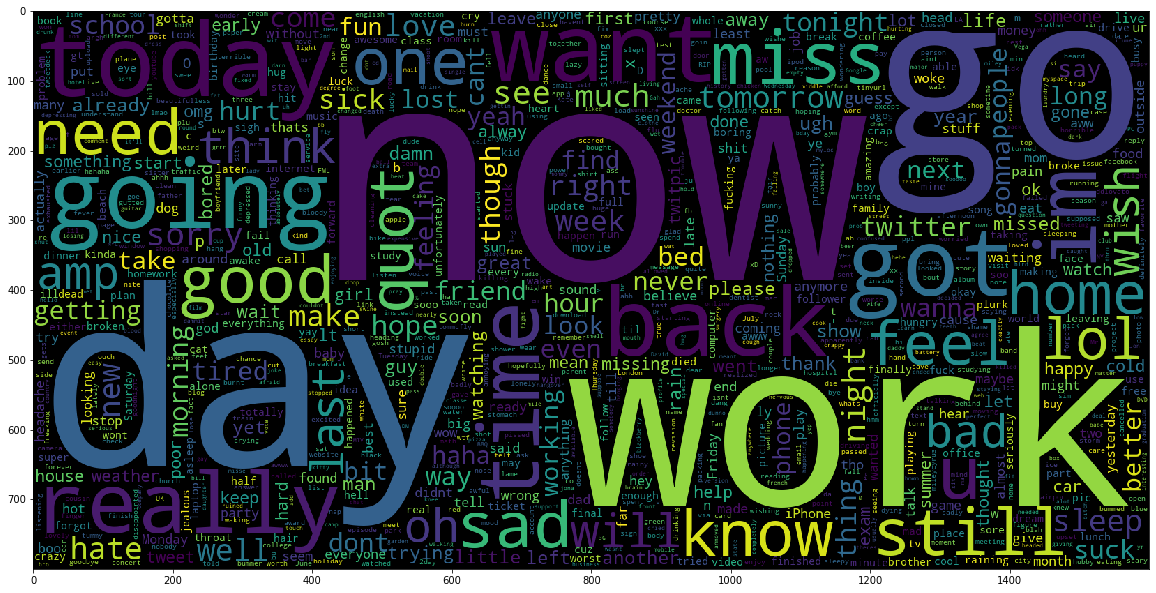

In [47]:
# Plotting word clouds:

print(new_test_df.shape)


# Word cloud for negative tweets
neg_tweet = s_analysis_df['text'][:800000]
plt.figure(figsize = (20,20))

neg_wordcloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(neg_tweet))
plt.imshow(neg_wordcloud)

# pos_sample = new_test_df['text'][25000:]

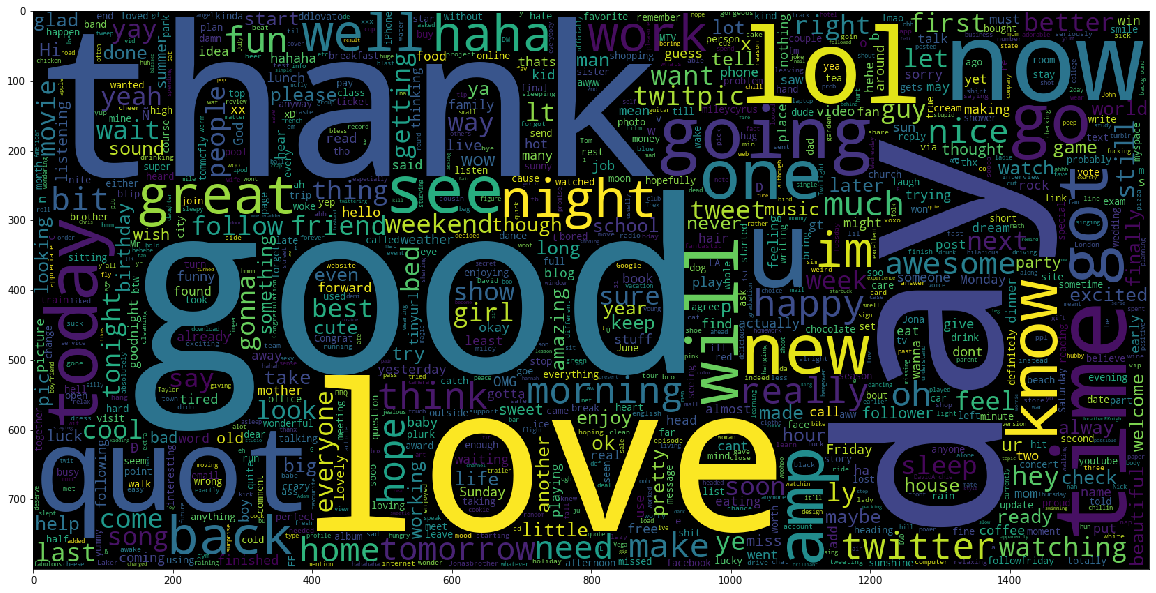

In [49]:
# Word cloud for positive tweets

pos_tweet = s_analysis_df['text'][800000:]

pos_wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(pos_tweet))
plt.figure(figsize=(20,20))
plt.imshow(pos_wordcloud)

## Data Modeling For Analysis

In [48]:
# Importing necessary modules for analysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [50]:
# Separate the predictor variable (text) and response variable (target)

x_df = s_analysis_df.text
y_df = s_analysis_df.target

In [51]:
x_df

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [55]:
# Splitting our data into train and test

# Let's have 95% of data for training and the remaining 5% data reserved for testing

X_train, X_test, Y_train, Y_test = train_test_split(x_df,y_df,test_size = 0.05, random_state =1)

In [56]:
# Transforming the data using tf-idf vectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: {}'.format(len(vectoriser.get_feature_names())))

No. of feature_words: 500000


In [57]:
# Using the vectorizer to transform the data

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

**Model Building and Evaluation**

In [58]:
# Let's define a model that provides us Accuracy score, confusion matrix and ROC-AUC Curve 

def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(Y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(Y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     39839
           1       0.80      0.81      0.80     40161

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



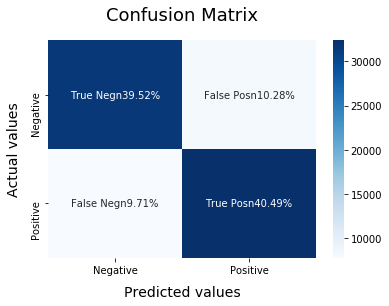

In [62]:
# Let's build the required model and evaluate it

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, Y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

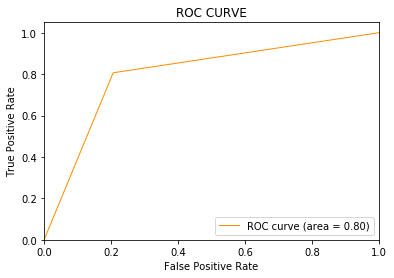

In [63]:
# Plotting the ROC-AUC curve

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     39839
           1       0.81      0.82      0.82     40161

    accuracy                           0.82     80000
   macro avg       0.82      0.81      0.82     80000
weighted avg       0.82      0.82      0.82     80000



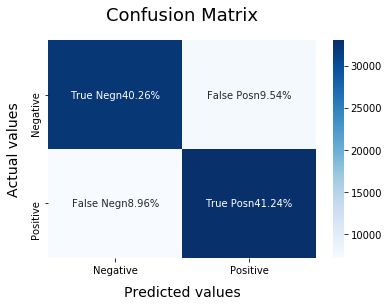

In [64]:
# SVC Model

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

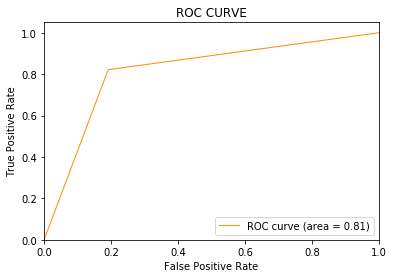

In [65]:
# Plotting the ROC-AUC curve for SVC model

fpr, tpr, thresholds = roc_curve(Y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     39839
           1       0.82      0.83      0.83     40161

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



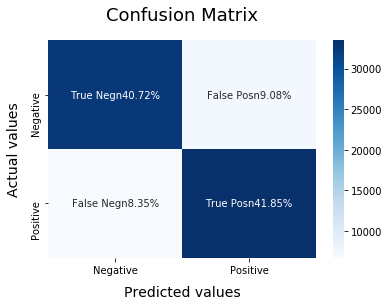

In [66]:

# Logistic Regression Model

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, Y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

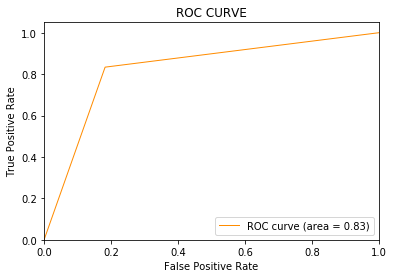

In [67]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.82      0.81     39839
           1       0.81      0.79      0.80     40161

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



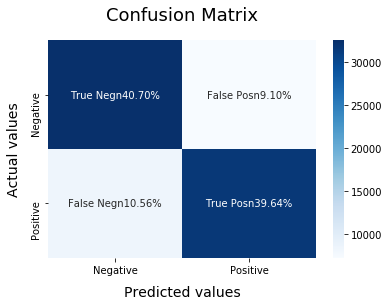

In [69]:
# Multinomial Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

Multi_NB_model = MultinomialNB()
Multi_NB_model.fit(X_train,Y_train)
model_Evaluate(Multi_NB_model)
y_pred4 = LRmodel.predict(X_test)

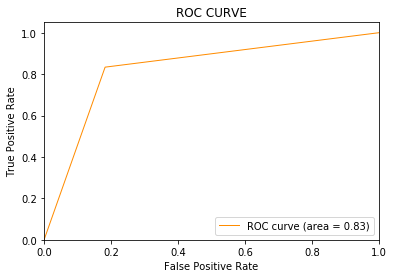

In [70]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     39839
           1       0.67      0.79      0.73     40161

    accuracy                           0.70     80000
   macro avg       0.71      0.70      0.70     80000
weighted avg       0.71      0.70      0.70     80000



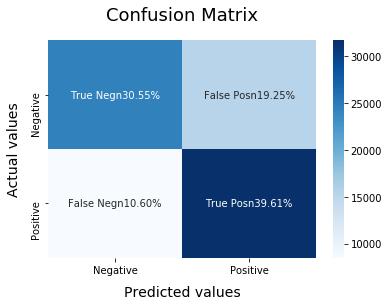

In [72]:
XGB_model = xgb.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
XGB_model.fit(X_train,Y_train)

model_Evaluate(XGB_model)
y_pred5 = XGB_model.predict(X_test)

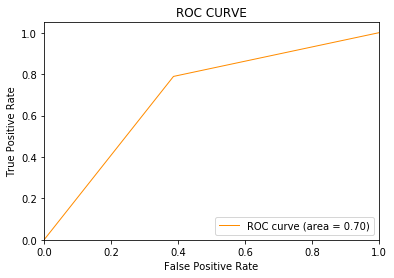

In [73]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred5)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [74]:
# Installing relevant libraries
!pip install tweepy
!pip install pycountry

     |████████████████████████████████| 63 kB 226 kB/s            
     |████████████████████████████████| 10.1 MB 2.6 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=027283ead15621cf3730c4dd67441c47bc4857edeff6ef80d2c13ab2eae81414
  Stored in directory: /Users/avinash/Library/Caches/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [76]:
import tweepy
import os
import pycountry

In [77]:
# Authentication for Twitter API

#Setting up the keys secured from Twitter

consumerKey = "Insert consumer key here"
consumerSecret = "Insert consumer secret here "
accessToken = "Insert access token here"
accessTokenSecret = "Insert access token secret here"

# Setting up the access to Twitter with tweepy API
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [79]:
# Getting tweets with keywords or hashtag

#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

# keyword = input(“Please enter keyword or hashtag to search: “)
# noOfTweet = int(input (“Please enter how many tweets to analyze: “))
keyword = "lockdown"
noOfTweets = 5

In [81]:
temp_tweet_list = []

In [82]:

for tweets in api.search_tweets(q="lockdown", lang="en", count = 5):
    print(tweets.text)
    temp_tweet_list.append(tweets.text)

RT @JesseKellyDC: You can hate Joe Biden and the communists all you want. And I do.

But don’t you dare lie to yourself or others. All the…
RT @ElochukwuOhagi: If by midnight of 4/11/2021 MNK is not released, From 5th-10th November, 2021. Their will be TOTAL LOCKDOWN all-over BI…
RT @JesseKellyDC: You can hate Joe Biden and the communists all you want. And I do.

But don’t you dare lie to yourself or others. All the…
RT @ElochukwuOhagi: If by midnight of 4/11/2021 MNK is not released, From 5th-10th November, 2021. Their will be TOTAL LOCKDOWN all-over BI…


In [89]:
tweet_sentiment_predictions = []
temp_tweet_list = [temp_tweet_list]

for tweet in temp_tweet_list:
    tweet = vectoriser.transform(tweet)
    pred_tweet_sentiment = LRmodel.predict(tweet)
    tweet_sentiment_predictions.append(pred_tweet_sentiment)
    
print(tweet_sentiment_predictions)

[array([1, 0, 1, 0])]


In [94]:
temp_tweet_list[0][0]


'RT @JesseKellyDC: You can hate Joe Biden and the communists all you want. And I do.\n\nBut don’t you dare lie to yourself or others. All the…'